train_data.shape = (1080, 64, 64, 3)
train_labels.shape = (1, 1080)
test_data.shape = (120, 64, 64, 3)
test_labels.shape = (1, 120)


C:\Users\Oleg\AppData\Local\Temp\ipykernel_5512\645208832.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(int(y[indices[index]]))


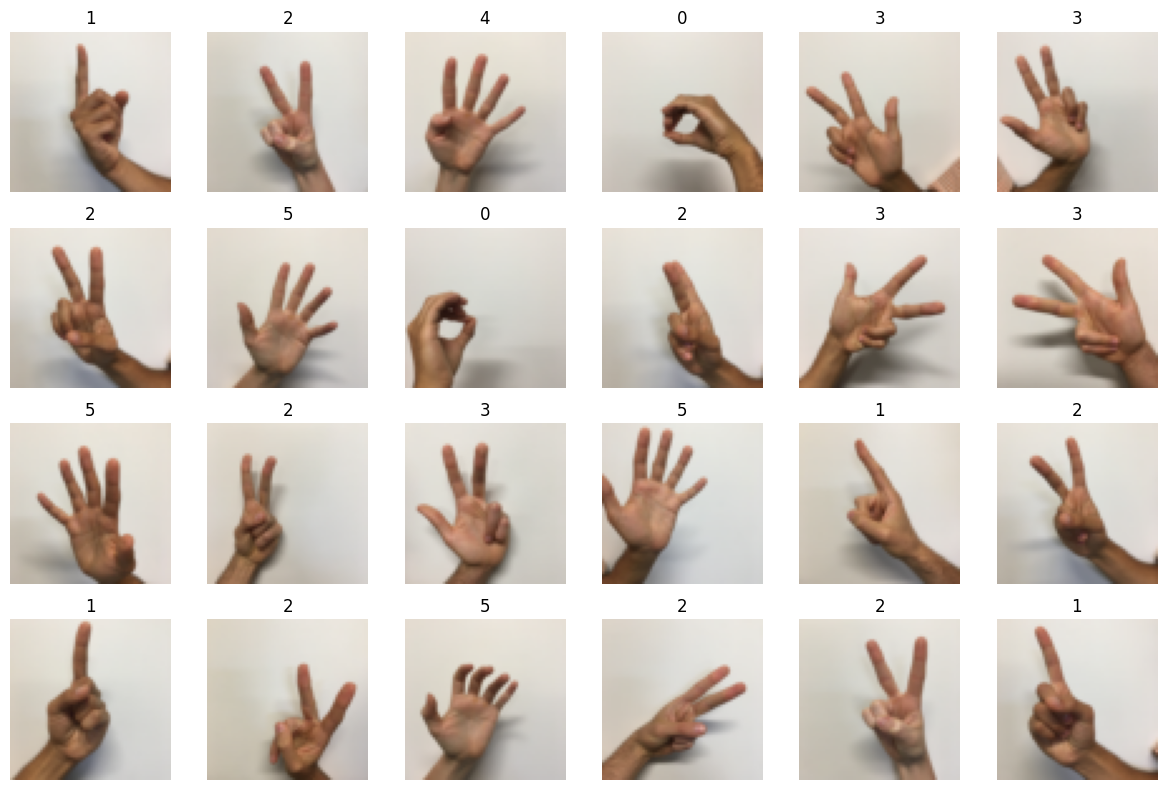

C:\Users\Oleg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.1675 - loss: 2.5750 - val_accuracy: 0.1667 - val_loss: 1.9563
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1573 - loss: 2.1935 - val_accuracy: 0.1667 - val_loss: 1.7989
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1740 - loss: 2.0686 - val_accuracy: 0.1667 - val_loss: 1.8113
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1702 - loss: 2.0860 - val_accuracy: 0.1667 - val_loss: 1.8176
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1808 - loss: 2.0368 - val_accuracy: 0.1667 - val_loss: 1.8100
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1617 - loss: 2.0451 - val_accuracy: 0.1667 - val_loss: 1.8119
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1840 - loss: 2.0345 - val_accuracy: 0.1667 - val_loss: 1.8065
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1664 - loss: 2.0022 - val_accuracy: 0.1667 - v

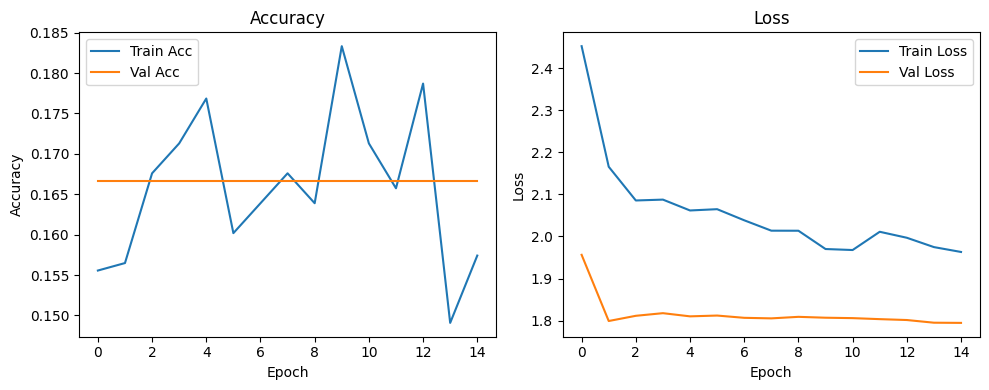

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# Завантаження датасету
def load_dataset():
    with h5py.File('train_signs.h5', "r") as train_dataset:
        X_train = np.array(train_dataset["train_set_x"][:])
        Y_train = np.array(train_dataset["train_set_y"][:])
    with h5py.File('test_signs.h5', "r") as test_dataset:
        X_test = np.array(test_dataset["test_set_x"][:])
        Y_test = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))

    return X_train, Y_train, X_test, Y_test, classes

# Показ прикладів зображень
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_cols * i + j
            ax = plt.subplot(n_rows, n_cols, index + 1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if y is not None:
                plt.title(int(y[indices[index]]))
            plt.axis('off')

# Завантаження даних
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print('train_data.shape =', train_data.shape)
print('train_labels.shape =', train_labels.shape)
print('test_data.shape =', test_data.shape)
print('test_labels.shape =', test_labels.shape)

# Візуалізація зображень
plt.figure(figsize=(12, 8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y=train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)
plt.show()

# Нормалізація та one-hot encoding
X_train = train_data / 255.0
X_test = test_data / 255.0
Y_train_cat = to_categorical(train_labels[0])
Y_test_cat = to_categorical(test_labels[0])

# Побудова моделі
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

# Компіляція
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання
history = model.fit(X_train, Y_train_cat,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_test, Y_test_cat))

# Візуалізація результатів
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
